In [90]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [91]:
import seaborn as sns
sns.set_context('notebook', font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid")

## Matrix inverse

In [12]:
import time
class Timer(object):
    def __init__(self, name=None):
        self.name = name

    def __enter__(self):
        self.tstart = time.time()

    def __exit__(self, type, value, traceback):
        if self.name:
            print('[%s]' % self.name,)
        print('Elapsed: %s' % (time.time() - self.tstart))

In [37]:
n = 1
result = {}
try:
    while True:
        X = np.random.random((n*1000, n*1000))
        t = time.time()
        X_inv = np.linalg.inv(X)
        elapsed = time.time() - t
        result[n*1000] = math.log10(elapsed)
        n += 1
except:
    print('exceeded')
    result

exceeded


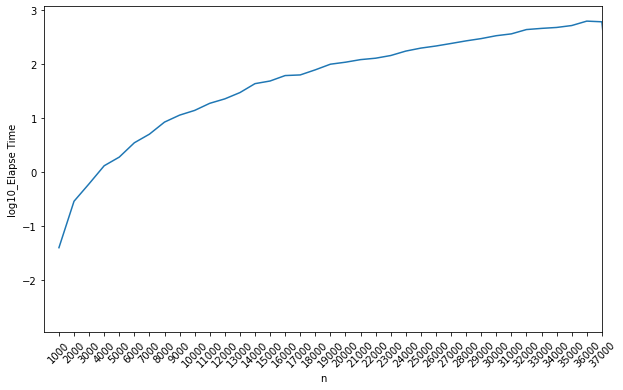

In [75]:
lists = sorted(result.items())
x, y = zip(*lists)

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(x, y)
ax.set_xlabel('n')
ax.set_ylabel('log10_Elapse Time');
ax.set_xlim([0, 37000])
ax.set_xticks(np.arange(min(x), 37001, 1000), np.arange(min(x), 37001, 1000), rotation=45, ha='center')
plt.show()


In [87]:
math.pow(10,result[37000])

615.0102007389067

#### Maximum n is 37000 using 615 seconds

## PCA

In [92]:
iris = datasets.load_iris()

In [93]:
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [94]:
data['species'] = data['target'].map({0.0: 'setosa', 1.0: 'versicolor', 2.0: 'virginica'})
#data = data.drop(['target'], axis = 1)

In [95]:
num_cols = data.describe().columns.to_list()[:-1]
for col in num_cols:
    data[col] = (data[col] - data[col].mean()) / data[col].std()

### (2) Standardizing data

In [96]:
data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,-0.897674,1.015602,-1.335752,-1.311052,0.0,setosa
1,-1.139200,-0.131539,-1.335752,-1.311052,0.0,setosa
2,-1.380727,0.327318,-1.392399,-1.311052,0.0,setosa


### (3) Computing p x p coveriance matrix

In [97]:
df_cov = data[num_cols].cov()
df_cov

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


### (4) Eigenvalue decomposition of p x p covariance matrix

In [98]:
D, Q = np.linalg.eig(df_cov.replace('n/a', 0).astype(float))

In [99]:
idx = D.argsort()[::-1] 
D = D[idx]
Q = Q[:,idx]

#### Eigenvectors

In [100]:
Q

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

#### Eigenvectors

In [101]:
D

array([2.91849782, 0.91403047, 0.14675688, 0.02071484])

### (5) Obtain First principal component and visualise its contribution 

In [102]:
D_first = D[0]
Q_first = Q[:,0]

In [103]:
Q_first

array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])

In [104]:
X = data[num_cols]
X_new = X*Q_first

In [105]:
data['First_principal'] = X_new[num_cols].sum(axis=1)

In [106]:
data['zeros'] = 0

<AxesSubplot:xlabel='First_principal', ylabel='zeros'>

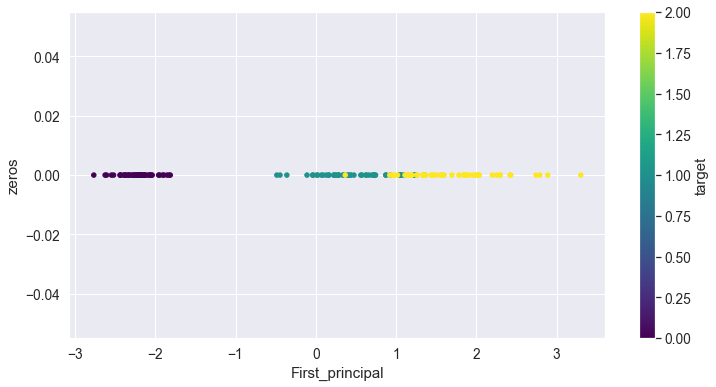

In [107]:
fig, ax= plt.subplots(figsize=(12, 6))
data.plot(kind = "scatter", 
            x='First_principal', 
            y = 'zeros', 
            c='target',
            cmap="viridis",
            marker = "o",
            ax=ax)

### (6) First and second principal components

In [108]:
D_first = D[0]
Q_first = Q[:,0]

In [109]:
D_second = D[1]
Q_second = Q[:,1]

In [110]:
Q_first

array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])

In [111]:
Q_second

array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])

In [112]:
X = data[num_cols]
X_new = X*Q_second

In [113]:
data['Second_principal'] = X_new[num_cols].sum(axis=1)

<AxesSubplot:xlabel='First_principal', ylabel='Second_principal'>

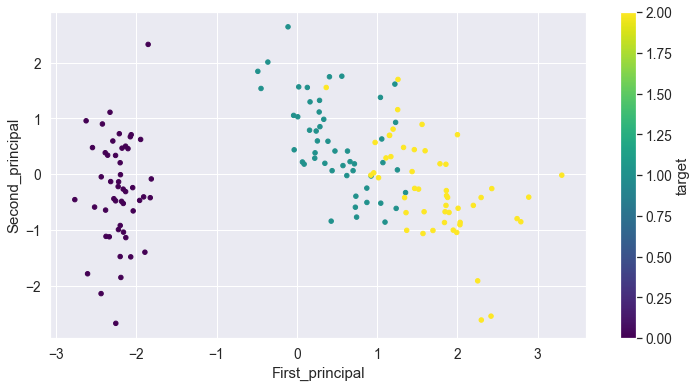

In [114]:
fig, ax= plt.subplots(figsize=(12, 6))
data.plot(kind = "scatter", 
            x='First_principal', 
            y = 'Second_principal', 
            c='target',
            cmap="viridis",
            marker = "o",
            ax=ax)